![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [5]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


Dataset shape: (332, 5)

Data types:
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Missing values:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Unique values in 'sex' column: ['MALE' 'FEMALE']


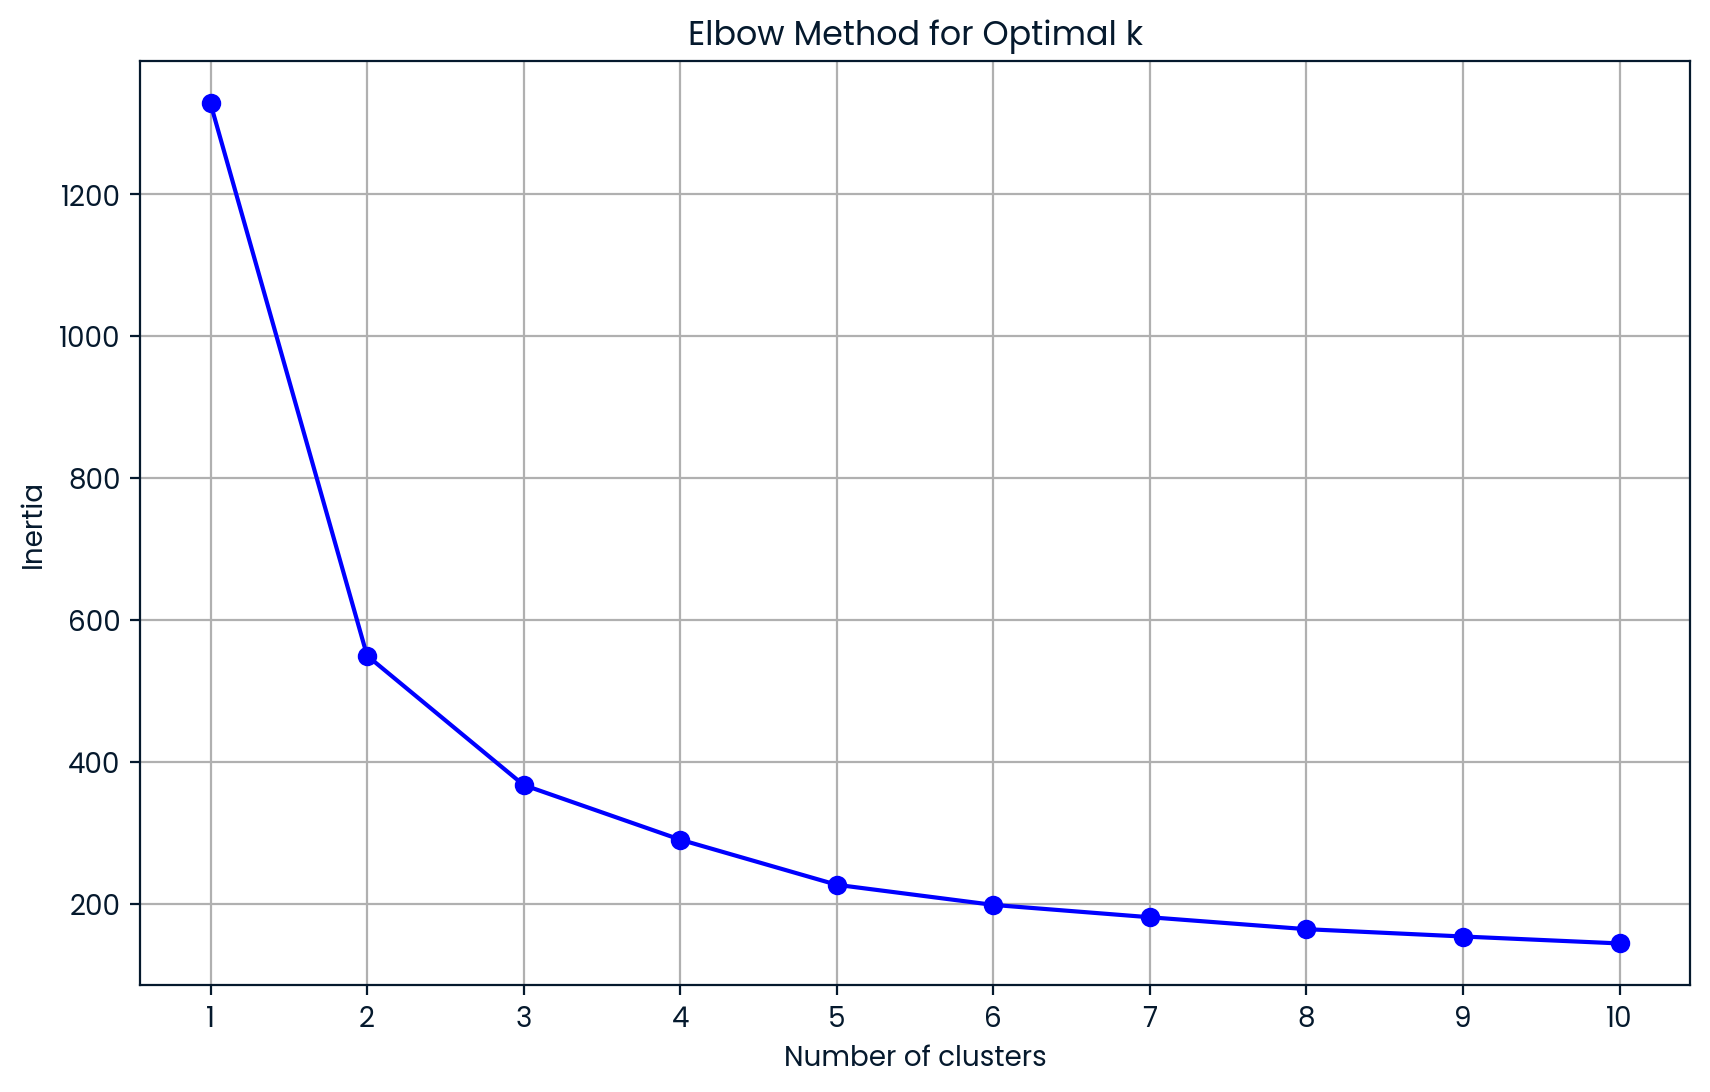


Cluster statistics:
         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0                   47.66            18.75             196.92      3898.24
1                   47.57            15.00             217.24      5092.44
2                   38.31            18.10             188.55      3587.50


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,47.66,18.75,196.92,3898.24
1,47.57,15.00,217.24,5092.44
2,38.31,18.10,188.55,3587.50


In [6]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

# Data exploration and preprocessing
print("Dataset shape:", penguins_df.shape)
print("\nData types:")
print(penguins_df.dtypes)
print("\nMissing values:")
print(penguins_df.isnull().sum())

# Drop rows with missing values
penguins_clean = penguins_df.dropna()

# Check if 'sex' column exists and handle it appropriately
print("\nUnique values in 'sex' column:", penguins_clean['sex'].unique())

# Since 'sex' is categorical, we'll exclude it from clustering
# Select only numeric columns for clustering
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_numeric = penguins_clean[numeric_cols]

# Standardize the data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_numeric)

# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(penguins_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Based on the elbow method, we'll choose 3 clusters (since we know there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(penguins_scaled)

# Add cluster labels to the cleaned dataframe
penguins_clean['cluster'] = clusters

# Create the stat_penguins DataFrame with mean values by cluster
stat_penguins = penguins_clean.groupby('cluster')[numeric_cols].mean()
stat_penguins = stat_penguins.round(2)

print("\nCluster statistics:")
print(stat_penguins)

# Display the final result
stat_penguins